In [1]:
import funcs.data_wrangling as dw
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import fbprophet
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')

rcParams['figure.figsize'] = 15, 5

In [5]:
l = []
if l:
    print(1)

In [2]:
os.listdir()

['.ipynb_checkpoints',
 '2_temp_wrangling.ipynb',
 'download_inmet.py',
 'eda.ipynb',
 'funcs',
 'inmet',
 'inmet_data.parquet',
 'inmet_database_sample.xlsx',
 'inmet_scraper.ipynb',
 'main.ipynb',
 'main.py',
 'models.ipynb',
 'parquet_files.ipynb',
 'scraping.ipynb']

In [3]:
"inmet" in os.listdir()

True

In [4]:
os.mkdir("inmet_teste")

In [2]:
data = dw.inmet_data(2000, 2023)
#data.download()
#data.build_database()
df = data.read_parquet()

In [5]:
df.dtypes

index                                                   float64
data                                                     object
hora                                                     object
precipitacao_total_horario_mm                           float64
pressao_atmosferica_ao_nivel_da_estacao_horaria_m_b     float64
pressao_atmosferica_max_na_hora_ant_aut_m_b             float64
pressao_atmosferica_min_na_hora_ant_aut_m_b             float64
radiacao_global_kj_m                                    float64
temperatura_do_ar_bulbo_seco_horaria_c                  float64
temperatura_do_ponto_de_orvalho_c                       float64
temperatura_maxima_na_hora_ant_aut_c                    float64
temperatura_minima_na_hora_ant_aut_c                    float64
temperatura_orvalho_max_na_hora_ant_aut_c               float64
temperatura_orvalho_min_na_hora_ant_aut_c               float64
umidade_rel_max_na_hora_ant_aut_%                       float64
umidade_rel_min_na_hora_ant_aut_%       

In [5]:
df = pd.read_parquet("inmet_data.parquet")
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 70915416 entries, ('BRASILIA', Timestamp('2000-05-07 00:00:00')) to ('CAMPOS NOVOS', Timestamp('2023-02-28 23:00:00'))
Data columns (total 21 columns):
 #   Column                                               Dtype   
---  ------                                               -----   
 0   data                                                 object  
 1   hora                                                 object  
 2   precipitacao_total_horario_mm                        float64 
 3   pressao_atmosferica_ao_nivel_da_estacao_horaria_m_b  float64 
 4   pressao_atmosferica_max_na_hora_ant_aut_m_b          float64 
 5   pressao_atmosferica_min_na_hora_ant_aut_m_b          float64 
 6   radiacao_global_kj_m                                 float64 
 7   temperatura_do_ar_bulbo_seco_horaria_c               float64 
 8   temperatura_do_ponto_de_orvalho_c                    float64 
 9   temperatura_maxima_na_hora_ant_aut_c                 flo

In [6]:
df.dtypes

data                                                     object
hora                                                     object
precipitacao_total_horario_mm                           float64
pressao_atmosferica_ao_nivel_da_estacao_horaria_m_b     float64
pressao_atmosferica_max_na_hora_ant_aut_m_b             float64
pressao_atmosferica_min_na_hora_ant_aut_m_b             float64
radiacao_global_kj_m                                    float64
temperatura_do_ar_bulbo_seco_horaria_c                  float64
temperatura_do_ponto_de_orvalho_c                       float64
temperatura_maxima_na_hora_ant_aut_c                    float64
temperatura_minima_na_hora_ant_aut_c                    float64
temperatura_orvalho_max_na_hora_ant_aut_c               float64
temperatura_orvalho_min_na_hora_ant_aut_c               float64
umidade_rel_max_na_hora_ant_aut_%                       float64
umidade_rel_min_na_hora_ant_aut_%                       float64
umidade_relativa_do_ar_horaria_%        

In [10]:
col_types = {
                        'precipitacao_total_horario_mm': float,
                        'pressao_atmosferica_ao_nivel_da_estacao_horaria_m_b': float,
                        'pressao_atmosferica_max_na_hora_ant_aut_m_b': float,
                        'pressao_atmosferica_min_na_hora_ant_aut_m_b': float,
                        'radiacao_global_kj_m': float,
                        'temperatura_do_ar_bulbo_seco_horaria_c': float,
                        'temperatura_do_ponto_de_orvalho_c': float,
                        'temperatura_maxima_na_hora_ant_aut_c': float,
                        'temperatura_minima_na_hora_ant_aut_c': float,
                        'temperatura_orvalho_max_na_hora_ant_aut_c': float,
                        'temperatura_orvalho_min_na_hora_ant_aut_c':float,
                        'umidade_rel_max_na_hora_ant_aut_%': float,
                        'umidade_rel_min_na_hora_ant_aut_%': float,
                        'umidade_relativa_do_ar_horaria_%': float,
                        'vento_direcao_horaria_gr_gr': float,
                        'vento_rajada_maxima_m_s': float,
                        'vento_velocidade_horaria_m_s': float,
                        #'estacao': 'category',
                        'uf': 'category',
                        'regiao': 'category'
                    } 

In [11]:
df0 = df.astype(col_types)
df0.dtypes

data                                                     object
hora                                                     object
precipitacao_total_horario_mm                           float64
pressao_atmosferica_ao_nivel_da_estacao_horaria_m_b     float64
pressao_atmosferica_max_na_hora_ant_aut_m_b             float64
pressao_atmosferica_min_na_hora_ant_aut_m_b             float64
radiacao_global_kj_m                                    float64
temperatura_do_ar_bulbo_seco_horaria_c                  float64
temperatura_do_ponto_de_orvalho_c                       float64
temperatura_maxima_na_hora_ant_aut_c                    float64
temperatura_minima_na_hora_ant_aut_c                    float64
temperatura_orvalho_max_na_hora_ant_aut_c               float64
temperatura_orvalho_min_na_hora_ant_aut_c               float64
umidade_rel_max_na_hora_ant_aut_%                       float64
umidade_rel_min_na_hora_ant_aut_%                       float64
umidade_relativa_do_ar_horaria_%        

In [ ]:
df.reset_index()

In [ ]:
inmet_file = os.listdir("inmet")[3]
os.listdir("inmet")

In [10]:
df_parquet = pd.read_parquet("inmet/" + inmet_file)

In [15]:
df_parquet_2 = df_parquet.set_index(["estacao","data_hora"])
df_parquet_2

data   hora  \
estacao       data_hora                                
BRASILIA      2003-01-01 00:00:00  2003-01-01  00:00   
              2003-01-01 01:00:00  2003-01-01  01:00   
              2003-01-01 02:00:00  2003-01-01  02:00   
              2003-01-01 03:00:00  2003-01-01  03:00   
              2003-01-01 04:00:00  2003-01-01  04:00   
...                                       ...    ...   
FLORIANOPOLIS 2003-12-31 19:00:00  2003-12-31  19:00   
              2003-12-31 20:00:00  2003-12-31  20:00   
              2003-12-31 21:00:00  2003-12-31  21:00   
              2003-12-31 22:00:00  2003-12-31  22:00   
              2003-12-31 23:00:00  2003-12-31  23:00   

                                   precipitacao_total_horario_mm  \
estacao       data_hora                                            
BRASILIA      2003-01-01 00:00:00                            0.0   
              2003-01-01 01:00:00                            0.0   
              2003-01-01 02:00:00                            0.0   
              2003-01-01 03:00:00                            0.0   
              2003-01-01 04:00:00                            0.0   
...                                                          ...   
FLORIANOPOLIS 2003-12-31 19:00:00                            9.8   
              2003-12-31 20:00:00                            0.0   
              2003-12-31 21:00:00                            0.0   
              2003-12-31 22:00:00                            0.0   
              2003-12-31 23:00:00                            0.0   

                                   pressao_atmosferica_ao_nivel_da_estacao_horaria_m_b  \
estacao       data_hora                                                                  
BRASILIA      2003-01-01 00:00:00                                              886.9     
              2003-01-01 01:00:00                                              887.3     
              2003-01-01 02:00:00                                              887.8     
              2003-01-01 03:00:00                                              886.9     
              2003-01-01 04:00:00                                              886.8     
...                                                                              ...     
FLORIANOPOLIS 2003-12-31 19:00:00                                             1008.8     
              2003-12-31 20:00:00                                             1010.1     
              2003-12-31 21:00:00                                             1011.2     
              2003-12-31 22:00:00                                             1012.6     
              2003-12-31 23:00:00                                             1013.6     

                                   pressao_atmosferica_max_na_hora_ant_aut_m_b  \
estacao       data_hora                                                          
BRASILIA      2003-01-01 00:00:00                                        887.0   
              2003-01-01 01:00:00                                        887.3   
              2003-01-01 02:00:00                                        887.8   
              2003-01-01 03:00:00                                        887.8   
              2003-01-01 04:00:00                                        886.9   
...                                                                        ...   
FLORIANOPOLIS 2003-12-31 19:00:00                                       1008.9   
              2003-12-31 20:00:00                                       1010.1   
              2003-12-31 21:00:00                                       1011.2   
              2003-12-31 22:00:00                                       1012.6   
              2003-12-31 23:00:00                                       1013.7   

                                   pressao_atmosferica_min_na_hora_ant_aut_m_b  \
estacao       data_hora                                                          
BRASILIA      2003-01-01 

In [2]:
df = dw.ons_data(freq='h', ano_inicio=2000, ano_fim=2023, idreg="S")

In [3]:
df.read()

In [3]:
df = scp.download_carga_diaria(2000, 2023, printer=True, write=True)

Lendo ano 2000...
Lendo ano 2001...
Lendo ano 2002...
Lendo ano 2003...
Lendo ano 2004...
Lendo ano 2005...
Lendo ano 2006...
Lendo ano 2007...
Lendo ano 2008...
Lendo ano 2009...
Lendo ano 2010...
Lendo ano 2011...
Lendo ano 2012...
Lendo ano 2013...
Lendo ano 2014...
Lendo ano 2015...
Lendo ano 2016...
Lendo ano 2017...
Lendo ano 2018...
Lendo ano 2019...
Lendo ano 2020...
Lendo ano 2021...
Lendo ano 2022...
Lendo ano 2023...
Escrevendo arquivo '../data/hourly_load.csv'.


In [4]:
df.isna().sum()

id_reg         0
desc_reg       0
load_mwmed    61
dtype: int64

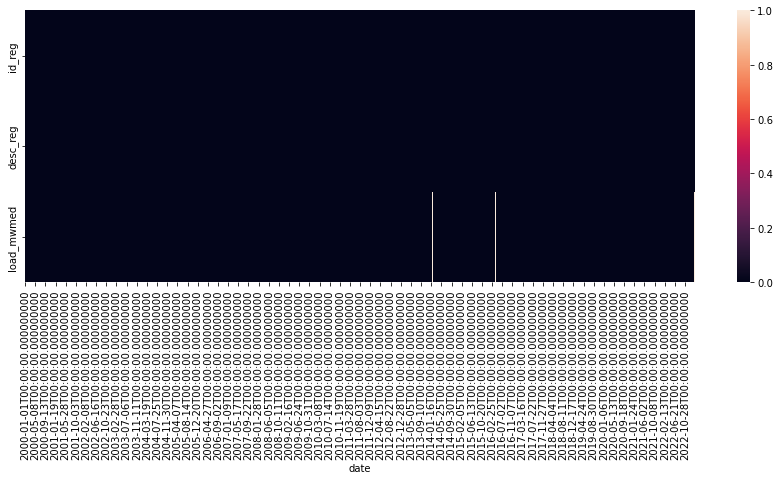

In [11]:
sns.heatmap(df.isna().transpose()) 
plt.show()

In [10]:
#df = df[df.id_reg=="S"]["load_mwmed"]
df = df.reset_index()
df.columns = ['ds', 'y']  # IMPORTANTE: RENOMEAR COLUNA DE DATA E DE OBSERVAÇÕES PARA O PROPHET

model = fbprophet.Prophet(daily_seasonality=True)
model.fit(df)

: 